In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
data=pd.read_csv('housing.csv')

In [3]:
data

,State,City,Street,Zipcode,Latitude,Longitude,Bedroom,Bathroom,Area,PPSq,LotArea,ConvertedLot,LotUnit,MarketEstimate,RentEstimate,Price
0,AL,Saraland,Scott Dr,36571.0,30.819534,-88.095960,4.0,2.0,1614.0,148.636927,0.38050,0.38050,acres,240600.0,1599.0,239900.0
1,AL,Southside,Big Oak Dr W,35907.0,33.881050,-86.012436,3.0,2.0,1474.0,0.000678,0.67034,0.67034,acres,186700.0,1381.0,1.0
2,AL,Robertsdale,Cowpen Creek Rd,36567.0,30.590004,-87.580376,3.0,2.0,1800.0,144.388889,3.20000,3.20000,acres,NaN,NaN,259900.0
3,AL,Gulf Shores,Spinnaker Dr #201,36542.0,30.284956,-87.747920,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,NaN,NaN,342500.0
4,AL,Chelsea,Mallet Way,35043.0,33.357986,-86.608700,3.0,3.0,2224.0,150.629496,0.26000,0.26000,acres,336200.0,1932.0,335000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24516,WY,Burns,Road 210a,82053.0,41.149517,-104.439620,2.0,1.0,1112.0,337.230216,20.00000,20.00000,acres,368600.0,1500.0,375000.0
24517,WY,Cody,Lincoln Ave,82414.0,44.524570,-109.033844,2.0,3.0,1232.0,241.801948,1306.80000,0.03000,sqft,NaN,NaN,297900.0
24518,WY,Dubois,Mason Dr,82513.0,43.521640,-109.594050,2.0,2.0,2016.0,262.896825,1.42000,1.42000,acres,NaN,2294.0,530000.0
24519,WY,Cheyenne,Carolina Rd,82009.0,41.138450,-105.052790,3.0,2.0,2930.0,196.552901,6.23000,6.23000,acres,558000.0,2749.0,575900.0


In [4]:
df2=data.drop(['MarketEstimate','Zipcode','Street','LotArea','LotUnit'],axis='columns')

In [5]:
df2.head()

,State,City,Latitude,Longitude,Bedroom,Bathroom,Area,PPSq,ConvertedLot,RentEstimate,Price
0,AL,Saraland,30.819534,-88.095960,4.0,2.0,1614.0,148.636927,0.38050,1599.0,239900.0
1,AL,Southside,33.881050,-86.012436,3.0,2.0,1474.0,0.000678,0.67034,1381.0,1.0
2,AL,Robertsdale,30.590004,-87.580376,3.0,2.0,1800.0,144.388889,3.20000,NaN,259900.0
3,AL,Gulf Shores,30.284956,-87.747920,2.0,2.0,1250.0,274.000000,NaN,NaN,342500.0
4,AL,Chelsea,33.357986,-86.608700,3.0,3.0,2224.0,150.629496,0.26000,1932.0,335000.0


In [6]:
df2.isnull().sum()

State            386
City             386
Latitude         386
Longitude        386
Bedroom         1065
Bathroom         997
Area            1492
PPSq            1737
ConvertedLot    1418
RentEstimate    6872
Price            391
dtype: int64

In [7]:
df3=df2.dropna()
df3.isnull().sum()

State           0
City            0
Latitude        0
Longitude       0
Bedroom         0
Bathroom        0
Area            0
PPSq            0
ConvertedLot    0
RentEstimate    0
Price           0
dtype: int64

In [8]:
df3.shape

(16136, 11)

In [9]:
df3

,State,City,Latitude,Longitude,Bedroom,Bathroom,Area,PPSq,ConvertedLot,RentEstimate,Price
0,AL,Saraland,30.819534,-88.095960,4.0,2.0,1614.0,148.636927,0.38050,1599.0,239900.0
1,AL,Southside,33.881050,-86.012436,3.0,2.0,1474.0,0.000678,0.67034,1381.0,1.0
4,AL,Chelsea,33.357986,-86.608700,3.0,3.0,2224.0,150.629496,0.26000,1932.0,335000.0
6,AL,Montgomery,32.372746,-86.165115,3.0,2.0,1564.0,96.547315,0.20000,1385.0,151000.0
7,AL,Boaz,34.210014,-86.136690,3.0,2.0,1717.0,139.196273,0.38000,2125.0,239000.0
...,...,...,...,...,...,...,...,...,...,...,...
24515,WY,Riverton,43.077744,-108.558960,3.0,3.0,2400.0,77.083333,3.35000,1999.0,185000.0
24516,WY,Burns,41.149517,-104.439620,2.0,1.0,1112.0,337.230216,20.00000,1500.0,375000.0
24518,WY,Dubois,43.521640,-109.594050,2.0,2.0,2016.0,262.896825,1.42000,2294.0,530000.0
24519,WY,Cheyenne,41.138450,-105.052790,3.0,2.0,2930.0,196.552901,6.23000,2749.0,575900.0


In [10]:
df3.Bedroom.unique()

array([ 4.,  3.,  5.,  6.,  2.,  1.,  0.,  7.,  8., 10., 13., 16.,  9.,
       12., 18., 23., 30., 11., 36.])

In [11]:
df3[df3.Bedroom>10]

,State,City,Latitude,Longitude,Bedroom,Bathroom,Area,PPSq,ConvertedLot,RentEstimate,Price
8525,ME,South Paris,44.264786,-70.500440,13.0,4.0,4931.0,29.405800,1.80,2999.0,145000.0
9742,MA,Leverett,42.436153,-72.512470,16.0,25.0,99990.0,230.023002,57.88,12627.0,23000000.0
10145,MI,Detroit,42.434810,-83.128426,12.0,14.0,34134.0,205.044823,2.06,18521.0,6999000.0
12098,MT,Whitefish,48.403927,-114.451920,18.0,12.0,8333.0,743.909756,30.91,21548.0,6199000.0
12192,MT,Alberton,47.016155,-114.389380,23.0,19.0,22000.0,1409.090909,1050.00,3764.0,31000000.0
12475,MT,Hamilton,46.245552,-114.065280,12.0,23.0,25000.0,328.000000,17.48,24326.0,8200000.0
13557,NH,Berlin,44.476196,-71.171300,12.0,4.0,5120.0,7.792969,0.05,9999.0,39900.0
19785,SD,Lemmon,45.933920,-102.133400,30.0,30.0,10900.0,38.532110,6.00,3200.0,420000.0
21671,VT,Ferrisburgh,44.237360,-73.315285,11.0,8.0,9580.0,2734.864301,345.00,25774.0,26200000.0
24058,WY,Buffalo,44.350723,-106.698620,13.0,11.0,6740.0,74.035608,0.27,2387.0,499000.0


In [12]:
#converting the lot area to square feet
df3["lotarea"]=df3["ConvertedLot"]*43560

C:\Users\rezgu\AppData\Local\Temp\ipykernel_21060\391281543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["lotarea"]=df3["ConvertedLot"]*43560


In [13]:
df3

,State,City,Latitude,Longitude,Bedroom,Bathroom,Area,PPSq,ConvertedLot,RentEstimate,Price,lotarea
0,AL,Saraland,30.819534,-88.095960,4.0,2.0,1614.0,148.636927,0.38050,1599.0,239900.0,16574.580
1,AL,Southside,33.881050,-86.012436,3.0,2.0,1474.0,0.000678,0.67034,1381.0,1.0,29200.000
4,AL,Chelsea,33.357986,-86.608700,3.0,3.0,2224.0,150.629496,0.26000,1932.0,335000.0,11325.600
6,AL,Montgomery,32.372746,-86.165115,3.0,2.0,1564.0,96.547315,0.20000,1385.0,151000.0,8712.000
7,AL,Boaz,34.210014,-86.136690,3.0,2.0,1717.0,139.196273,0.38000,2125.0,239000.0,16552.800
...,...,...,...,...,...,...,...,...,...,...,...,...
24515,WY,Riverton,43.077744,-108.558960,3.0,3.0,2400.0,77.083333,3.35000,1999.0,185000.0,145926.000
24516,WY,Burns,41.149517,-104.439620,2.0,1.0,1112.0,337.230216,20.00000,1500.0,375000.0,871200.000
24518,WY,Dubois,43.521640,-109.594050,2.0,2.0,2016.0,262.896825,1.42000,2294.0,530000.0,61855.200
24519,WY,Cheyenne,41.138450,-105.052790,3.0,2.0,2930.0,196.552901,6.23000,2749.0,575900.0,271378.800


In [14]:
df4=df3.drop(['ConvertedLot'],axis='columns')

In [15]:
df4

,State,City,Latitude,Longitude,Bedroom,Bathroom,Area,PPSq,RentEstimate,Price,lotarea
0,AL,Saraland,30.819534,-88.095960,4.0,2.0,1614.0,148.636927,1599.0,239900.0,16574.580
1,AL,Southside,33.881050,-86.012436,3.0,2.0,1474.0,0.000678,1381.0,1.0,29200.000
4,AL,Chelsea,33.357986,-86.608700,3.0,3.0,2224.0,150.629496,1932.0,335000.0,11325.600
6,AL,Montgomery,32.372746,-86.165115,3.0,2.0,1564.0,96.547315,1385.0,151000.0,8712.000
7,AL,Boaz,34.210014,-86.136690,3.0,2.0,1717.0,139.196273,2125.0,239000.0,16552.800
...,...,...,...,...,...,...,...,...,...,...,...
24515,WY,Riverton,43.077744,-108.558960,3.0,3.0,2400.0,77.083333,1999.0,185000.0,145926.000
24516,WY,Burns,41.149517,-104.439620,2.0,1.0,1112.0,337.230216,1500.0,375000.0,871200.000
24518,WY,Dubois,43.521640,-109.594050,2.0,2.0,2016.0,262.896825,2294.0,530000.0,61855.200
24519,WY,Cheyenne,41.138450,-105.052790,3.0,2.0,2930.0,196.552901,2749.0,575900.0,271378.800


In [16]:
df4.State.value_counts()

State
AK    464
MI    462
CA    455
MA    443
UT    429
MS    428
MO    421
PA    408
ND    407
TX    399
VA    391
SC    387
MD    386
KS    380
SD    379
WY    377
IA    372
WI    368
NC    367
KY    362
GA    359
AR    355
WA    347
CT    331
ID    330
VT    324
NE    319
MN    318
CO    317
MT    310
OK    306
NM    304
DE    304
WV    299
NV    298
TN    292
NH    292
FL    290
IN    288
RI    272
ME    257
AL    245
NJ    241
NY    209
IL    202
OR    183
AZ    167
OH    149
LA    143
Name: count, dtype: int64

In [17]:
city_stats=df4.City.value_counts()
city_stats

City
Las Vegas        157
Lincoln          152
Kansas City      105
Anchorage        100
Rapid City        96
                ... 
Thompsonville      1
Plainwell          1
Watersmeet         1
Sodus              1
Mills              1
Name: count, Length: 4520, dtype: int64

In [18]:
city_stats[city_stats<=10]

City
Colorado Springs    10
Castle Rock         10
Lucedale            10
Amherst             10
Spring              10
                    ..
Thompsonville        1
Plainwell            1
Watersmeet           1
Sodus                1
Mills                1
Name: count, Length: 4244, dtype: int64

In [19]:
city_stats_less_than_10=city_stats[city_stats<=10]
city_stats_less_than_10

City
Colorado Springs    10
Castle Rock         10
Lucedale            10
Amherst             10
Spring              10
                    ..
Thompsonville        1
Plainwell            1
Watersmeet           1
Sodus                1
Mills                1
Name: count, Length: 4244, dtype: int64

In [20]:
df4.City=df4.City.apply(lambda x: 'other' if x in city_stats_less_than_10 else x)

In [21]:
df4

,State,City,Latitude,Longitude,Bedroom,Bathroom,Area,PPSq,RentEstimate,Price,lotarea
0,AL,other,30.819534,-88.095960,4.0,2.0,1614.0,148.636927,1599.0,239900.0,16574.580
1,AL,other,33.881050,-86.012436,3.0,2.0,1474.0,0.000678,1381.0,1.0,29200.000
4,AL,other,33.357986,-86.608700,3.0,3.0,2224.0,150.629496,1932.0,335000.0,11325.600
6,AL,Montgomery,32.372746,-86.165115,3.0,2.0,1564.0,96.547315,1385.0,151000.0,8712.000
7,AL,other,34.210014,-86.136690,3.0,2.0,1717.0,139.196273,2125.0,239000.0,16552.800
...,...,...,...,...,...,...,...,...,...,...,...
24515,WY,Riverton,43.077744,-108.558960,3.0,3.0,2400.0,77.083333,1999.0,185000.0,145926.000
24516,WY,other,41.149517,-104.439620,2.0,1.0,1112.0,337.230216,1500.0,375000.0,871200.000
24518,WY,other,43.521640,-109.594050,2.0,2.0,2016.0,262.896825,2294.0,530000.0,61855.200
24519,WY,Cheyenne,41.138450,-105.052790,3.0,2.0,2930.0,196.552901,2749.0,575900.0,271378.800


In [22]:
df5=df4[~ ((df4.Area /df4.Bedroom ) <250)]
df5.shape

(16077, 11)

In [23]:
df5.PPSq.describe()

count    16077.000000
mean       220.032648
std        241.786052
min          0.000000
25%        131.600000
50%        181.757576
75%        252.365931
max      17130.620985
Name: PPSq, dtype: float64

In [24]:
#removing houses with price per square feet very low or very high according to the City
def remove_ppsq_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('City'):
        m=np.mean(subdf.PPSq)
        st=np.std(subdf.PPSq)
        reduced_df=subdf[(subdf.PPSq>(m-st)) & (subdf.PPSq<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df6=remove_ppsq_outliers(df5)
df6.shape


(13856, 11)

In [25]:
df6.PPSq.describe()

count    13856.000000
mean       190.741371
std         90.469519
min          1.318565
25%        131.816920
50%        177.021463
75%        236.576161
max       1332.116788
Name: PPSq, dtype: float64

In [26]:
#removing houses where number of bathrooms is more than number of bedrooms
df7=df6[~(df6.Bathroom>df6.Bedroom)]
df7.shape

(13398, 11)

In [27]:

state_dummies=pd.get_dummies(df7.State,dtype=int)

In [28]:
cities_dummies=pd.get_dummies(df7.City,dtype=int)

In [29]:
df8=pd.concat([df7,state_dummies,cities_dummies.drop("other",axis="columns")],axis='columns')

In [30]:
df8.head()

,State,City,Latitude,Longitude,Bedroom,Bathroom,Area,PPSq,RentEstimate,Price,...,Wichita,Williston,Wilmington,Winchester,Woodstock,Woonsocket,Worcester,Yankton,York,Yukon
0,MD,Aberdeen,39.451800,-76.22411,3.0,2.0,1400.0,82.785714,1999.0,115900.0,...,0,0,0,0,0,0,0,0,0,0
1,MS,Aberdeen,33.835827,-88.58266,3.0,2.0,1642.0,91.352010,1099.0,150000.0,...,0,0,0,0,0,0,0,0,0,0
2,MS,Aberdeen,33.960754,-88.58531,3.0,2.0,2148.0,139.618250,1050.0,299900.0,...,0,0,0,0,0,0,0,0,0,0
3,MS,Aberdeen,33.845783,-88.50958,4.0,3.0,1792.0,144.531250,1099.0,259000.0,...,0,0,0,0,0,0,0,0,0,0
4,SD,Aberdeen,45.474796,-98.60404,4.0,3.0,3056.0,163.612238,2474.0,499999.0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df9=df8.drop(['State','City'],axis='columns')

In [32]:
x=df9.drop(['Price','PPSq','RentEstimate'],axis='columns')
y=df9.Price

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [34]:
#using linear regression model
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
lr_model.score(x_test,y_test)

0.6506133240630007

In [35]:
#using the Random  forest regression
from sklearn.ensemble import RandomForestRegressor
scaler=StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9419218969727157

In [36]:
rf.score(x_test,y_test)

0.680963038204057

In [38]:
#using the XGBRegressor
from xgboost import XGBRegressor
model=XGBRegressor()


In [39]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [44]:
test_prediction=model.predict(x_test)

In [45]:
# R squared error
score_1=metrics.r2_score(y_test,test_prediction)

# Mean Absolute Error
score_2=metrics.mean_absolute_error(y_test,test_prediction)

print("R squared error : ",score_1)
print("Mean Absolute Error : ",score_2)

R squared error :  0.7044616982792646
Mean Absolute Error :  83444.47748804804


In [47]:
model.score(x_test,y_test)

0.7044616982792646

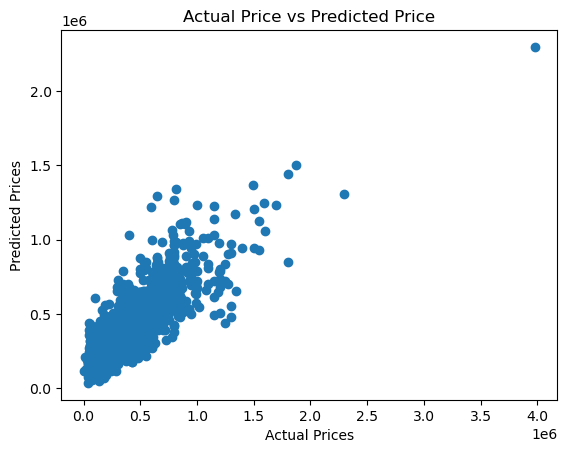

In [48]:
plt.scatter(y_test,test_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()